# **Pendahuluan**
Dataset yang digunakan dalam analisis ini adalah "Car Evaluation" yang bersumber dari UCI Machine Learning Repository. Dataset ini berasal dari model evaluasi mobil sederhana yang kemudian diubah menjadi dataset untuk keperluan klasifikasi. Dataset ini sangat populer untuk tujuan edukasi dan pembandingan performa model karena strukturnya yang jelas dan datanya yang bersih.

Dataset ini memiliki 1728 data (instance) dan 7 atribut yang semuanya bersifat kategorikal, di mana 6 atribut berfungsi sebagai fitur dan 1 atribut sebagai kelas target.



## **Sumber Data**

Data saya ambil dari
https://archive.ics.uci.edu/dataset/19/car+evaluation

# **Data Understanding**

##**Tujuan**
Tujuan utamanya adalah untuk memprediksi tingkat kelayakan sebuah mobil berdasarkan atribut-atributnya.

## **Penjelasan Setiap Fitur (Variabel) Dataset**

Berikut adalah penjelasan detail untuk setiap kolom dalam dataset **Car Evaluation** yang sudah kita proses:

* **`buying` (Harga Beli)**: Atribut kategorikal yang menunjukkan harga pembelian mobil.
    * `vhigh` (very high / sangat tinggi)
    * `high` (tinggi)
    * `med` (medium / sedang)
    * `low` (rendah)

* **`maint` (Biaya Perawatan)**: Atribut kategorikal untuk biaya pemeliharaan mobil.
    * `vhigh` (very high / sangat tinggi)
    * `high` (tinggi)
    * `med` (medium / sedang)
    * `low` (rendah)

* **`doors` (Jumlah Pintu)**: Atribut kategorikal untuk jumlah pintu pada mobil.
    * `2`
    * `3`
    * `4`
    * `5more` (5 atau lebih)

* **`persons` (Kapasitas Penumpang)**: Atribut kategorikal untuk kapasitas penumpang mobil.
    * `2`
    * `4`
    * `more` (lebih dari 4)

* **`lug_boot` (Ukuran Bagasi)**: Atribut kategorikal untuk ukuran bagasi mobil.
    * `small` (kecil)
    * `med` (sedang)
    * `big` (besar)

* **`safety` (Tingkat Keamanan)**: Atribut kategorikal untuk estimasi tingkat keamanan mobil.
    * `low` (rendah)
    * `med` (sedang)
    * `high` (tinggi)

* **`class` (Kelas Evaluasi)**: Ini adalah **variabel target** atau label yang ingin diprediksi. Kolom ini berisi hasil evaluasi mobil berdasarkan keenam atribut lainnya.
    * `unacc` (unacceptable / tidak dapat diterima)
    * `acc` (acceptable / dapat diterima)
    * `good` (baik)
    * `vgood` (very good / sangat baik)

## **Integrasi Data**
Untuk mengambil data agar dapat diolah, perlu untuk menginstall package yang telah disediakan oleh UCI Dataset. Instalasi dilakukan berguna untuk menarik data yang berasal dari UCI dataset agar dapat diolah. peritah untuk mengambil data dari UCI dataset dapat di lihat ketika menekan tombol import in python pada datase yang diinginkan dan ikuti perintah tersebut agar data dapat diambil dari UCI dataset. Contoh pengambilan data dari UCI dataset dapat dilihat pada gambar dan perintah berikut:

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

# metadata
print(car_evaluation.metadata)

# variable information
print(car_evaluation.variables)

# simpan dalam csv
df_lengkap.to_csv('car_evaluation_lengkap.csv', index=False)

print("Data berhasil disimpan ke file 'car_evaluation_lengkap.csv'")


{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

NameError: name 'df_lengkap' is not defined

# **Eksplorasi Data**


### **Langkah 1: Import Library dan Memuat Data**

Pertama, kita siapkan semua "alat" (library) yang kita butuhkan dan memuat dataset dari file /`car_evaluation_lengkap.csv`ke dalam DataFrame pandas.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tentukan nama kolom yang benar sesuai deskripsi dataset
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Muat data dari file CSV.
# header=None memberitahu pandas bahwa file kita tidak punya baris judul.
# names=column_names akan menetapkan nama kolom yang sudah kita siapkan.
df = pd.read_csv('car_evaluation_lengkap.csv', header=None, names=column_names)

print("Data berhasil dimuat. Berikut 5 baris pertama:")
print(df.head())

Data berhasil dimuat. Berikut 5 baris pertama:
   buying  maint  doors  persons  lug_boot  safety  class
0  buying  maint  doors  persons  lug_boot  safety  class
1   vhigh  vhigh      2        2     small     low  unacc
2   vhigh  vhigh      2        2     small     med  unacc
3   vhigh  vhigh      2        2     small    high  unacc
4   vhigh  vhigh      2        2       med     low  unacc


**Penjelasan**: Kode di atas hanya fokus pada persiapan awal: mengimpor library dan memastikan data kita dimuat dengan nama kolom yang benar.

###**Langkah 2: Membersihkan Anomali Data**

Dari analisis sebelumnya, kita tahu bahwa nama-nama kolom (buying, maint, dll.) ikut terbaca sebagai data. Langkah ini fokus untuk membersihkan baris anomali tersebut.

In [ ]:
print("\n--- Langkah 2: Membersihkan Anomali Data ---")
initial_rows = len(df)

# Kita akan menghapus baris di mana nilai pada kolom 'buying' adalah string 'buying'.
# Ini adalah cara efektif untuk membuang baris header yang salah tempat.
df_cleaned = df[df['buying'] != 'buying'].reset_index(drop=True)

final_rows = len(df_cleaned)
print(f"Jumlah baris sebelum dibersihkan: {initial_rows}")
print(f"Jumlah baris setelah dibersihkan: {final_rows}")
print(f"Jumlah baris anomali yang dihapus: {initial_rows - final_rows}")


--- Langkah 2: Membersihkan Anomali Data ---
Jumlah baris sebelum dibersihkan: 1729
Jumlah baris setelah dibersihkan: 1728
Jumlah baris anomali yang dihapus: 1


**Penjelasan:** Blok ini secara spesifik menangani masalah kualitas data yang ditemukan sebelumnya. Kita sekarang memiliki DataFrame baru bernama df_cleaned yang lebih bersih.

### **Langkah 3: Pengecekan Missing Values**
Sekarang, pada data yang sudah bersih, kita periksa apakah ada sel yang kosong atau tidak.

In [ ]:
print("\n--- Langkah 3: Pengecekan Missing Values ---")

# Menghitung jumlah nilai null (kosong) di setiap kolom pada data yang sudah bersih
missing_values = df_cleaned.isnull().sum()

if missing_values.sum() == 0:
    print("Hasil: Tidak ada missing value di dalam dataset yang sudah dibersihkan.")
else:
    print("Ditemukan missing value pada kolom berikut:")
    print(missing_values[missing_values > 0])


--- Langkah 3: Pengecekan Missing Values ---
Hasil: Tidak ada missing value di dalam dataset yang sudah dibersihkan.


**Penjelasan:** Kode ini menjalankan satu tugas spesifik: verifikasi missing values. Dengan memisahkannya, kita bisa langsung melihat hasil dari pengecekan ini.

### **Langkah 4: Analisis Distribusi Nilai (Value Counts)**
Blok ini bertujuan untuk memahami isi dari setiap kolom: ada kategori apa saja dan berapa jumlahnya.

In [ ]:
print("\n--- Langkah 4: Analisis Distribusi Nilai per Kolom ---")

# Melakukan iterasi untuk setiap kolom di DataFrame yang sudah bersih
for column in df_cleaned.columns:
    print(f"\nDistribusi untuk kolom '{column}':")
    # .value_counts() menghitung frekuensi setiap nilai unik
    print(df_cleaned[column].value_counts())


--- Langkah 4: Analisis Distribusi Nilai per Kolom ---

Distribusi untuk kolom 'buying':
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

Distribusi untuk kolom 'maint':
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

Distribusi untuk kolom 'doors':
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

Distribusi untuk kolom 'persons':
persons
2       576
4       576
more    576
Name: count, dtype: int64

Distribusi untuk kolom 'lug_boot':
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

Distribusi untuk kolom 'safety':
safety
low     576
med     576
high    576
Name: count, dtype: int64

Distribusi untuk kolom 'class':
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


**Penjelasan:** Bagian ini membantu kita memahami komposisi data dan memastikan tidak ada lagi nilai-nilai aneh setelah pembersihan.

### **Langkah 5: Visualisasi Distribusi Fitur**
Terakhir, kita buat visualisasi untuk semua kolom agar lebih mudah melihat pola dan distribusinya secara sekilas.


--- Langkah 5: Membuat Visualisasi Distribusi ---


/tmp/ipython-input-18-1998771751.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cleaned[col], ax=axes[i], palette='viridis', order=df_cleaned[col].value_counts().index)
/tmp/ipython-input-18-1998771751.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cleaned[col], ax=axes[i], palette='viridis', order=df_cleaned[col].value_counts().index)
/tmp/ipython-input-18-1998771751.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cleaned[col], ax=axes[i], palette='viridis', order=df_cleaned[col].value_counts().index)
/

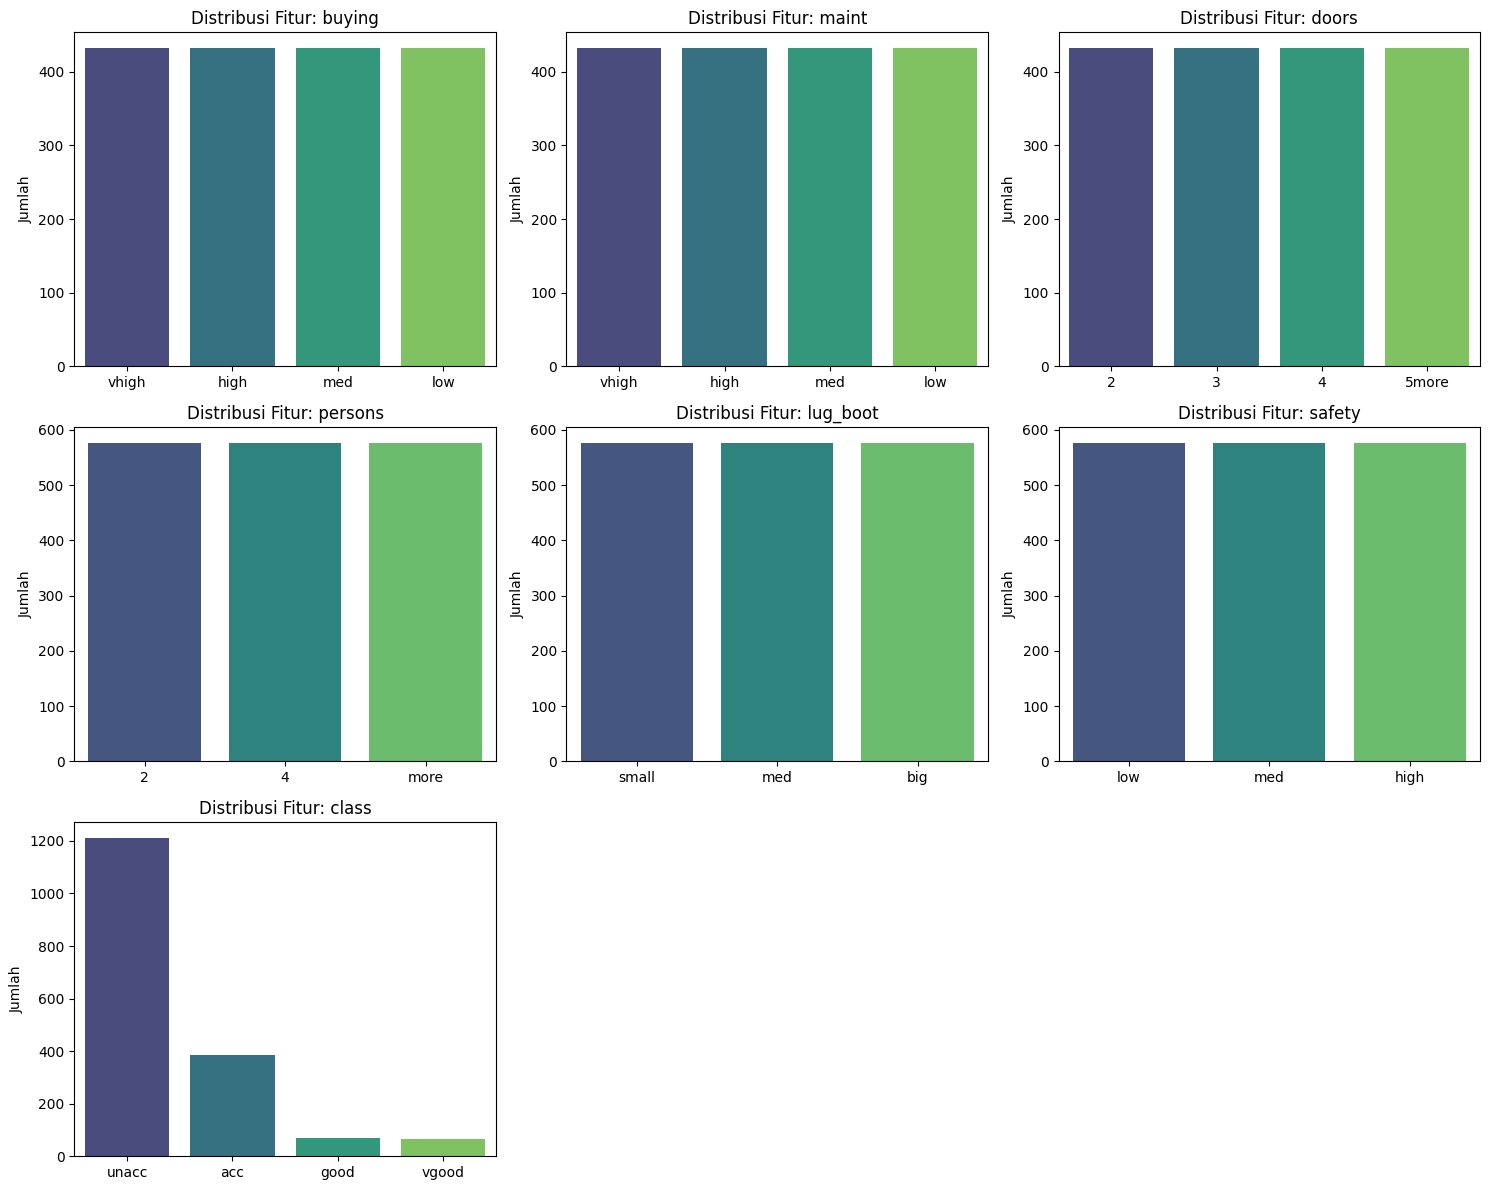


Visualisasi selesai ditampilkan.


In [ ]:
print("\n--- Langkah 5: Membuat Visualisasi Distribusi ---")

# Menentukan tata letak grid untuk plot (3 kolom per baris)
num_cols = 3
num_rows = (len(df_cleaned.columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten() # Meratakan array axes agar mudah di-loop

# Membuat plot untuk setiap kolom
for i, col in enumerate(df_cleaned.columns):
    sns.countplot(x=df_cleaned[col], ax=axes[i], palette='viridis', order=df_cleaned[col].value_counts().index)
    axes[i].set_title(f'Distribusi Fitur: {col}')
    axes[i].set_xlabel('') # Hapus label x agar tidak berantakan
    axes[i].set_ylabel('Jumlah')

# Menyembunyikan subplot yang tidak terpakai
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout() # Merapikan tata letak
plt.show() # Menampilkan plot ke layar

print("\nVisualisasi selesai ditampilkan.")

**Penjelasan:** Kode ini didedikasikan sepenuhnya untuk visualisasi. Memisahkannya seperti ini sangat membantu, terutama jika kita ingin mengubah atau menyesuaikan tampilan plot di kemudian hari.

# **Visualisasi Data**

Mempersiapkan data...
Data bersih siap digunakan.

Membuat Visualisasi 1: Safety vs. Class...
Visualisasi 1 berhasil disimpan sebagai 'visualisasi_safety_vs_class.png'

Membuat Visualisasi 2: Buying Price vs. Class...
Visualisasi 2 berhasil disimpan sebagai 'visualisasi_buying_vs_class.png'

Membuat Visualisasi 3: Persons vs. Class...
Visualisasi 3 berhasil disimpan sebagai 'visualisasi_persons_vs_class.png'


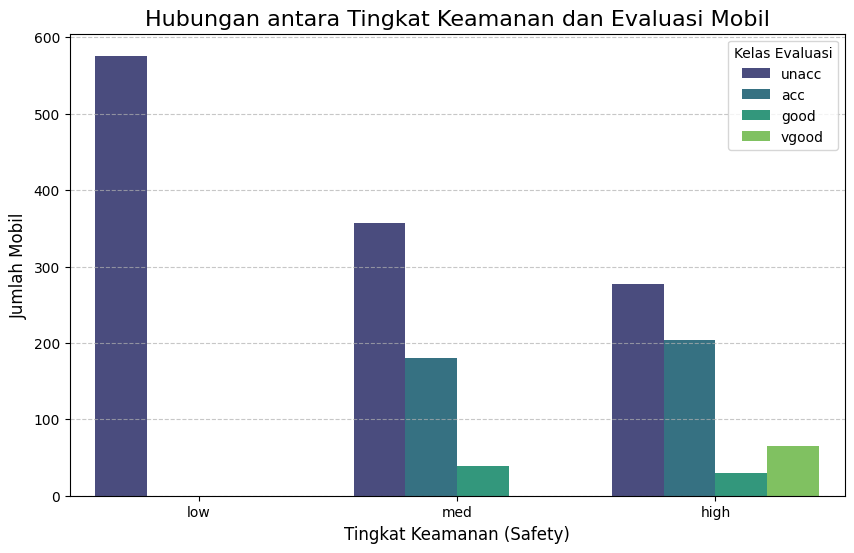

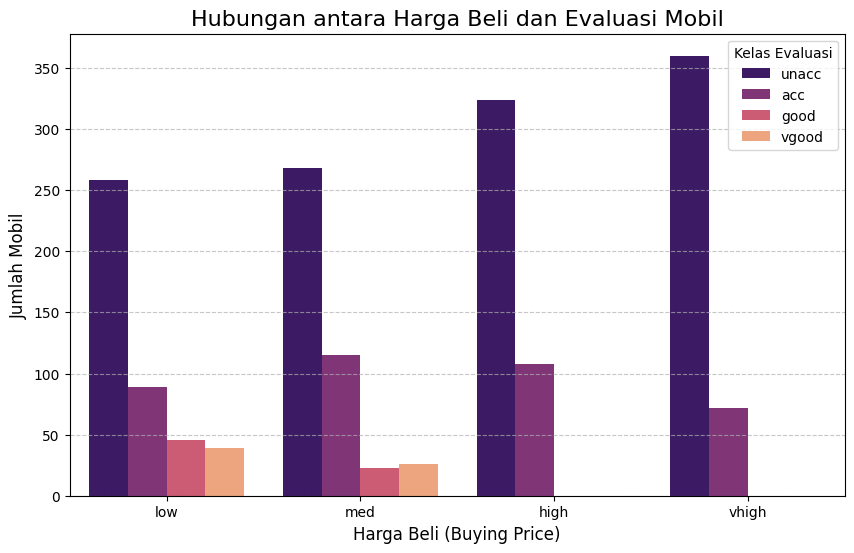

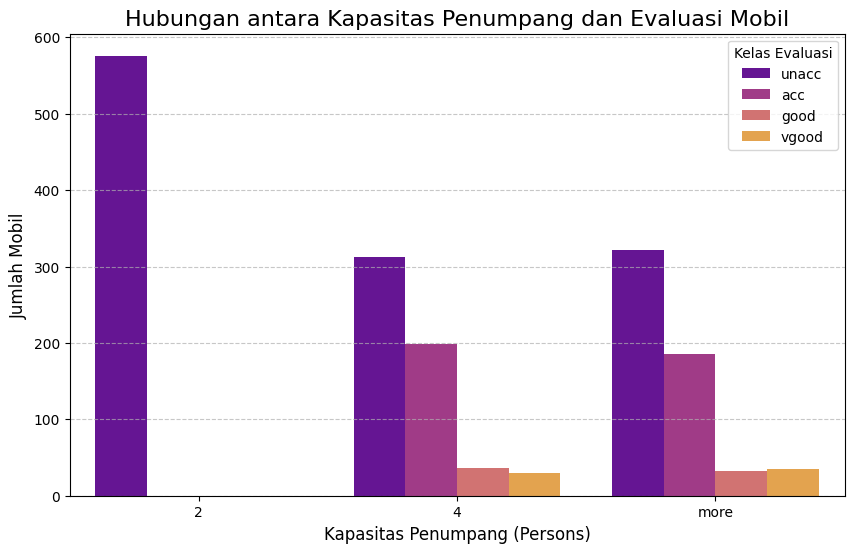

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Langsung saja, mari kita buat beberapa visualisasi yang lebih mendalam
# untuk memahami hubungan antar variabel.

# --- Persiapan Data (Sama seperti sebelumnya) ---
# Langkah ini memastikan kita bekerja dengan data yang bersih.
print("Mempersiapkan data...")
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv('car_evaluation_lengkap.csv', header=None, names=column_names)
# Membersihkan anomali data (baris header yang terbaca sebagai data)
df_cleaned = df[df['buying'] != 'buying'].reset_index(drop=True)
print("Data bersih siap digunakan.")

# --- Visualisasi 1: Hubungan antara Tingkat Keamanan (Safety) dan Kelas Evaluasi ---
# Visualisasi ini sangat penting untuk melihat apakah keamanan menjadi faktor penentu.
print("\nMembuat Visualisasi 1: Safety vs. Class...")
plt.figure(figsize=(10, 6))
sns.countplot(x='safety', hue='class', data=df_cleaned, palette='viridis',
              order=['low', 'med', 'high'],  # Urutkan sumbu x agar lebih logis
              hue_order=['unacc', 'acc', 'good', 'vgood']) # Urutkan legenda
plt.title('Hubungan antara Tingkat Keamanan dan Evaluasi Mobil', fontsize=16)
plt.xlabel('Tingkat Keamanan (Safety)', fontsize=12)
plt.ylabel('Jumlah Mobil', fontsize=12)
plt.legend(title='Kelas Evaluasi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('visualisasi_safety_vs_class.png')
print("Visualisasi 1 berhasil disimpan sebagai 'visualisasi_safety_vs_class.png'")


# --- Visualisasi 2: Hubungan antara Harga Beli (Buying) dan Kelas Evaluasi ---
# Visualisasi ini membantu kita memahami pengaruh harga terhadap penerimaan mobil.
print("\nMembuat Visualisasi 2: Buying Price vs. Class...")
plt.figure(figsize=(10, 6))
sns.countplot(x='buying', hue='class', data=df_cleaned, palette='magma',
              order=['low', 'med', 'high', 'vhigh'], # Urutkan sumbu x agar lebih logis
              hue_order=['unacc', 'acc', 'good', 'vgood']) # Urutkan legenda
plt.title('Hubungan antara Harga Beli dan Evaluasi Mobil', fontsize=16)
plt.xlabel('Harga Beli (Buying Price)', fontsize=12)
plt.ylabel('Jumlah Mobil', fontsize=12)
plt.legend(title='Kelas Evaluasi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('visualisasi_buying_vs_class.png')
print("Visualisasi 2 berhasil disimpan sebagai 'visualisasi_buying_vs_class.png'")

# --- Visualisasi 3: Pengaruh Kapasitas Penumpang (Persons) ---
# Apakah mobil dengan kapasitas 2 orang bisa diterima? Mari kita lihat.
print("\nMembuat Visualisasi 3: Persons vs. Class...")
plt.figure(figsize=(10, 6))
sns.countplot(x='persons', hue='class', data=df_cleaned, palette='plasma',
              order=['2', '4', 'more'], # Urutkan sumbu x agar lebih logis
              hue_order=['unacc', 'acc', 'good', 'vgood']) # Urutkan legenda
plt.title('Hubungan antara Kapasitas Penumpang dan Evaluasi Mobil', fontsize=16)
plt.xlabel('Kapasitas Penumpang (Persons)', fontsize=12)
plt.ylabel('Jumlah Mobil', fontsize=12)
plt.legend(title='Kelas Evaluasi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('visualisasi_persons_vs_class.png')
print("Visualisasi 3 berhasil disimpan sebagai 'visualisasi_persons_vs_class.png'")

## **Penjelasan**

1. Hubungan antara Tingkat Keamanan (Safety) dan Evaluasi Mobil
Visualisasi ini menunjukkan betapa krusialnya faktor keamanan dalam penentuan kelayakan sebuah mobil.

2. Hubungan antara Harga Beli (Buying) dan Evaluasi Mobil
Grafik ini memperlihatkan bagaimana harga menjadi salah satu pertimbangan utama dalam evaluasi.

3. Hubungan antara Kapasitas Penumpang (Persons) dan Evaluasi Mobil
Kapasitas angkut penumpang juga ternyata menjadi syarat mutlak dalam model evaluasi ini.

# **Preprocessing (Encoding)**


**Langkah preprocessing yang paling penting adalah Encoding** untuk mengubah teks menjadi angka.

Setelah melalui proses di atas, dataset df_processed kini sepenuhnya dalam format numerik dan siap untuk digunakan dalam melatih model machine learning seperti Decision Tree, Random Forest, dan lainnya

### **Implementasi**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# --- 1. Pemuatan dan Pembersihan Data (Sama seperti sebelumnya) ---
print("--- Memuat dan Membersihkan Data ---")
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv('car_evaluation_lengkap.csv', header=None, names=column_names)
df_cleaned = df[df['buying'] != 'buying'].reset_index(drop=True)

print("Data Awal (Sebelum Preprocessing):")
print(df_cleaned.head())


# --- 2. Preprocessing: Label Encoding ---
# Ini adalah langkah preprocessing yang paling penting untuk dataset ini.
print("\n--- Melakukan Label Encoding ---")

# Buat salinan DataFrame agar data asli tetap utuh
df_processed = df_cleaned.copy()

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Lakukan loop untuk setiap kolom dan ubah nilainya menjadi numerik
for column in df_processed.columns:
    df_processed[column] = le.fit_transform(df_processed[column])
    # Menampilkan mapping untuk beberapa kolom sebagai contoh
    if column in ['buying', 'class']:
        # Untuk melihat mapping-nya (opsional)
        print(f"Mapping untuk kolom '{column}':")
        # Mencetak kelas dan hasil transformasinya
        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(mapping)


# --- 3. Hasil Akhir ---
print("\nData Akhir (Setelah Preprocessing dengan Label Encoding):")
print(df_processed.head())

print("\n\nProses preprocessing selesai. Data sekarang sepenuhnya numerik dan siap untuk pemodelan.")

# Anda bisa menyimpan data yang sudah diproses ini jika perlu

# df_processed.to_csv('car_evaluation_processed.csv', index=False)

--- Memuat dan Membersihkan Data ---
Data Awal (Sebelum Preprocessing):
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

--- Melakukan Label Encoding ---
Mapping untuk kolom 'buying':
{'high': np.int64(0), 'low': np.int64(1), 'med': np.int64(2), 'vhigh': np.int64(3)}
Mapping untuk kolom 'class':
{'acc': np.int64(0), 'good': np.int64(1), 'unacc': np.int64(2), 'vgood': np.int64(3)}

Data Akhir (Setelah Preprocessing dengan Label Encoding):
   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      

# **Klasifikasi**

Berdasarkan konteks data yang memiliki kolom target (class), maka metode yang paling sesuai adalah Klasifikasi. Tujuannya adalah untuk melatih sebuah model yang bisa memprediksi kategori evaluasi mobil berdasarkan fitur-fiturnya.



**Model klasifikasi menggunakan algoritma Decision Tree.** Berikut adalah hasil dan penjelasannya.

--- 1. Memuat, Membersihkan, dan Melakukan Encoding Data ---
Data berhasil disiapkan dan diubah menjadi format numerik.
Contoh data setelah diproses:
   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2

--- 2. Memisahkan Fitur (X) dan Target (y) ---
Fitur (X) dan Target (y) berhasil didefinisikan.

--- 3. Membagi Data Training dan Testing ---
Ukuran data training: 1382 baris
Ukuran data testing: 346 baris

--- 4. Melatih Model Decision Tree ---
Model Decision Tree berhasil dilatih.

--- 5. Mengevaluasi Performa Model ---
Akurasi Model: 97.98%
              precision    recall  f1-score   support

         acc       0.96      0.96      0.96        77
        good       0.82      1.00      0.90   

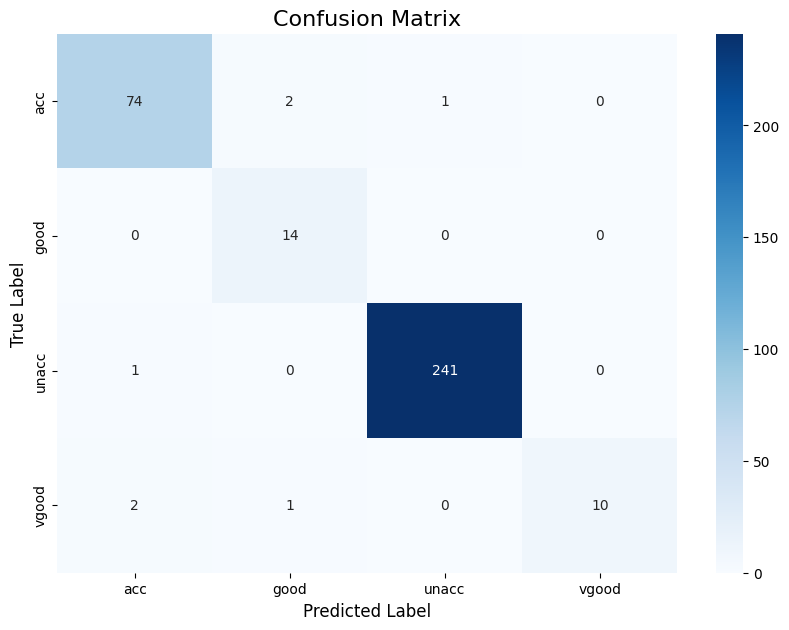

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- 1. Pemuatan dan Persiapan Data ---
print("--- 1. Memuat, Membersihkan, dan Melakukan Encoding Data ---")
# Menyiapkan nama kolom
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
# Memuat data dari file
df = pd.read_csv('car_evaluation_lengkap.csv', header=None, names=column_names)

# Membersihkan anomali data (baris header yang terbaca sebagai data)
df_cleaned = df[df['buying'] != 'buying'].reset_index(drop=True)

# Melakukan Encoding (mengubah teks menjadi angka)
df_processed = df_cleaned.copy()
le_dict = {} # Dictionary untuk menyimpan encoder setiap kolom
for column in df_processed.columns:
    le = LabelEncoder()
    df_processed[column] = le.fit_transform(df_processed[column])
    le_dict[column] = le # Simpan encoder untuk referensi nanti

print("Data berhasil disiapkan dan diubah menjadi format numerik.")
print("Contoh data setelah diproses:")
print(df_processed.head())


# --- 2. Mendefinisikan Fitur (X) dan Target (y) ---
print("\n--- 2. Memisahkan Fitur (X) dan Target (y) ---")
X = df_processed.drop('class', axis=1)
y = df_processed['class']
print("Fitur (X) dan Target (y) berhasil didefinisikan.")


# --- 3. Membagi Data menjadi Training dan Testing ---
print("\n--- 3. Membagi Data Training dan Testing ---")
# Membagi data: 80% untuk training, 20% untuk testing
# `stratify=y` sangat penting untuk memastikan proporsi kelas target sama di data train dan test,
# karena data kita tidak seimbang (imbalanced).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Ukuran data training: {len(X_train)} baris")
print(f"Ukuran data testing: {len(X_test)} baris")


# --- 4. Melatih Model Klasifikasi (Decision Tree) ---
print("\n--- 4. Melatih Model Decision Tree ---")
# Membuat model Decision Tree
# `criterion='entropy'` sering digunakan untuk information gain
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Melatih model menggunakan data training
model.fit(X_train, y_train)
print("Model Decision Tree berhasil dilatih.")


# --- 5. Mengevaluasi Performa Model ---
print("\n--- 5. Mengevaluasi Performa Model ---")
# Membuat prediksi pada data testing
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

# Menampilkan Laporan Klasifikasi
print("\nLaporan Klasifikasi:")
# Menggunakan nama kelas asli dari LabelEncoder untuk laporan yang lebih mudah dibaca
class_names = le_dict['class'].classes_
print(classification_report(y_test, y_pred, target_names=class_names))


# --- 6. Membuat Visualisasi Confusion Matrix ---
print("\n--- 6. Membuat Visualisasi Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.savefig('confusion_matrix.png')
print("Visualisasi Confusion Matrix berhasil disimpan sebagai 'confusion_matrix.png'")

### **Hasil Kinerja Model**
Model yang kita latih menunjukkan performa yang sangat baik.

Akurasi Keseluruhan: 97.98% Artinya, model berhasil menebak evaluasi mobil dengan benar pada sekitar 98 dari 100 mobil dalam data pengujian yang belum pernah dilihat sebelumnya.

**Penjelasan Laporan:**

- **Kelas unacc** (tidak diterima): Model ini sempurna dalam mengidentifikasi mobil yang tidak dapat diterima (precision dan recall = 1.00). Ini adalah kelas mayoritas, dan aturannya mungkin sangat jelas (misal: safety rendah = unacc).

- **Kelas acc** (diterima): Performa juga sangat kuat untuk kelas ini (precision dan recall = 0.96).

- **Kelas good** (baik): Model berhasil menemukan semua mobil yang 'good' (recall = 1.00). Namun, terkadang ia salah mengira mobil lain sebagai 'good' (precision = 0.82).

- **Kelas vgood**(sangat baik): Ketika model menebak sebuah mobil adalah 'vgood', tebakannya selalu benar
(precision = 1.00). Namun, ia sedikit kesulitan menemukan semua mobil 'vgood' yang ada, dan melewatkan sekitar 23% di antaranya (recall = 0.77).

# **Evaluasi model**

Secara singkat, model Decision Tree ini sangat baik dan efektif, namun memiliki beberapa karakteristik penting yang perlu diperhatikan:

Akurasi Tinggi namun Bervariasi: Model ini mencapai akurasi sangat tinggi (~97%) pada pengujian tunggal, namun pengujian yang lebih stabil (Cross-Validation) menunjukkan performa rata-rata yang lebih realistis yaitu ~88%. Ini berarti model ini kuat, tetapi kinerjanya bisa bervariasi.

###Kemampuan Mengenali Setiap Kelas

- **Kelas** unacc **(Tidak Diterima): A+ (Sempurna)**
  - Model ini mampu mengidentifikasi semua mobil yang tidak layak tanpa kesalahan. Sangat ideal untuk penyaringan awal.

- **Kelas** acc **(Diterima): A (Sangat Baik)**
  - Model juga menunjukkan performa yang sangat kuat dan andal dalam mengenali mobil yang secara umum dapat diterima.
  
- **Kelas** good & vgood **(Baik & Sangat Baik): B (Baik dengan Catatan)**
  - **Presisi Tinggi:** Ketika model ini mengatakan sebuah mobil 'baik' atau 'sangat baik', prediksinya cenderung benar.
  - **Recall Lebih Rendah:** Kelemahannya adalah ia terkadang melewatkan beberapa mobil yang seharusnya masuk dalam kategori ini. Model ini lebih "berhati-hati" daripada "menyeluruh" dalam menemukan mobil terbaik.

### **Kelebihan Utama:**
Model sempurna dalam mendeteksi mobil yang tidak layak (unacc) dan memiliki presisi (ketepatan) yang tinggi saat memprediksi mobil kategori good atau vgood. Jika ia menebak suatu mobil 'baik' atau 'sangat baik', tebakannya cenderung benar.

### **Kelemahan Utama:**
 Kelemahannya adalah terkadang melewatkan beberapa mobil yang sebenarnya masuk kategori good dan vgood (recall lebih rendah), serta performanya yang agak sensitif terhadap bagaimana data dibagi.

### **Rekomendasi Penggunaan**

- **Sangat Direkomendasikan Untuk:** Digunakan sebagai sistem **penyaringan tahap pertama** untuk secara cepat dan akurat mengeliminasi mobil-mobil yang pasti tidak memenuhi syarat.

- **Perlu Verifikasi Untuk:** Menemukan mobil-mobil kategori terbaik (good dan vgood). Hasil dari model sebaiknya dianggap sebagai **kandidat kuat** yang mungkin masih memerlukan validasi lebih lanjut, karena ada kemungkinan beberapa kasus terlewat.

### **Kesimpulan Akhir:**
Model Decision Tree ini tetap merupakan model yang baik dan kuat (dengan akurasi rata-rata ~88%). Namun, evaluasi lanjutan dengan cross-validation memberikan kita wawasan krusial bahwa performanya tidak sekonsisten yang terlihat di awal. Model ini bisa bekerja dengan sangat baik pada beberapa set data, namun kinerjanya bisa menurun pada set data lainnya.